# センサデータを解析するためのプログラム
## 流れ
### DataFrameにして、時系列グラフやヒストグラムなどで可視化

## ライブラリインポート

In [7]:
#必要なものいろいろインポートするでー
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

## sensor dataを読み込んでDataFrameに落とし込むclass

In [8]:
class Sensor_Data:
        #違うセンサデータファイルでもclassのメソッドを使えるように初期化
    def __init__(self, file_name, delimiter, header, time, sensor1, probs, unit1, unit2):
        self.file_name = file_name #ファイルの名前
        self.delimiter = delimiter #delimiter…txtファイルで、隣り合うデータの区切り。半角スペースが多いかも
        self.header = header #ファイルのヘッダー
        #self.date = date #txtファイルで記録している日付
        self.time = time #テキストファイルで記録している時間
        self.sensor1 = sensor1 #テキストファイルで記録したsensor
        #self.sensor2 = sensor2
        self.probs = probs #表を回数→確率にするときに使う。（表の項目設定に使う。）
        self.unit1 = unit1
        self.unit2 = unit2
    
    def sensor_dataframe(self):
        global data
        data = pd.read_csv(self.file_name, self.delimiter, self.header, names = (self.time, self.unit1))
        data[self.unit2] = data[self.unit1] * 10** 4 #単位変換[G]->[T]
        return data 
       

In [9]:
sensor_data = Sensor_Data("3DM-DH_center_gnu_0706_2nd.txt", " ", None, "time[μs]", "center", "Probs", "magnetic intensity of z-axis[G]","magnetic intensity of z-axis[T]" )
data_frame = sensor_data.sensor_dataframe()
#data_frame["magnetic intensity of z-axis[T]"] = data_frame["magnetic intensity of z-axis[G]"] * 10** (4)
data_frame


/tmp/ipykernel_626/2601637816.py:2: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  data_frame = sensor_data.sensor_dataframe()


,time[μs],magnetic intensity of z-axis[G],magnetic intensity of z-axis[T]
0,11054585741,0.602080,6020.80
1,11054585984,0.602080,6020.80
2,11054586211,0.602080,6020.80
3,11054586419,0.602080,6020.80
4,11054586627,0.602080,6020.80
...,...,...,...
8408198,12857938230,0.600347,6003.47
8408199,12857938442,0.600347,6003.47
8408200,12857938659,0.600347,6003.47
8408201,12857938905,0.600347,6003.47


## グラフを作るclass
### time_series_plt(self) : 時系列グラフをプロットする関数

In [10]:
class Graph_Plot(Sensor_Data):
    #def __init__(self):
        #super().__init__()
    
    def time_series_plt(self):
        data = super().sensor_dataframe()
        #data = super().data
        
        fig, ax = plt.subplots()
        plt.figure(figsize=(6, 4))
        ax.plot(data[self.time], data[self.unit2])
        ax.set_xlabel(self.time)
        ax.set_ylabel(self.unit2)
        ax.set_title(self.sensor1)
        plt.show()
        
    def histgram_plt(self):
        data = super().sensor_dataframe()
        #return data["magnetic intensity of z-axis[T]"].values
        
        mag = []
        for i in range(len(data)):
            mag.append(data[self.unit2][i])
            
        """
        fig1, ax = plt.subplots()
        hist = ax.hist(data["magnetic intensity of z-axis[T]"].values, bins=30)
        ax.plot(hist)
        ax.set_xlabel("magnetic intensity of z-axis[T]")
        ax.set_ylabel("frequency")
        ax.set_title("histgram")
        plt.show()
        """
        plt.figure(figsize=(6, 4))
        plt.title(self.sensor1)
        plt.xlabel(self.unit2)
        plt.ylabel("frequency")
        plt.hist(mag, bins=30)
        plt.grid(True)
        plt.show()
        
        #print(data[self.unit])
        

/tmp/ipykernel_626/669095725.py:6: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  data = super().sensor_dataframe()


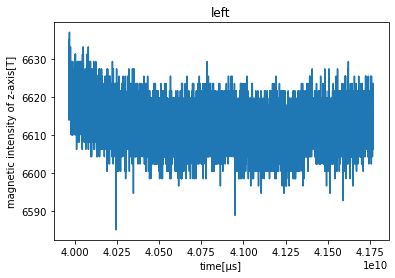

<Figure size 432x288 with 0 Axes>

In [15]:
graph_plot = Graph_Plot("3DM-DH_left_gnu_0705_2nd.txt", " ", None, "time[μs]", "left", "Probs", "magnetic intensity of z-axis[G]", "magnetic intensity of z-axis[T]")
#time_series = Time_Series()
graph_plot.time_series_plt()

/tmp/ipykernel_626/669095725.py:18: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  data = super().sensor_dataframe()


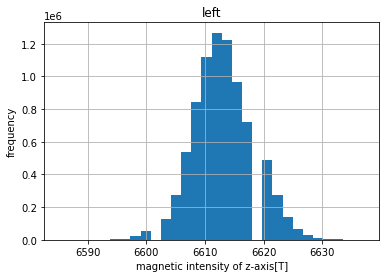

In [16]:
graph_plot.histgram_plt()